In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [5]:
dataset_path = '/content/ds_salaries.csv'
df = pd.read_csv(dataset_path)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [7]:
print(df.describe())

       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


In [8]:
print(df.head())

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

Numerical data is: work_year, salary, salary_in_usd, remotr_retio. It is strustured. Also columns experience_level, employment_type, salary_currency, employee_residence, company_location and company_size contain structured data.


In [9]:
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [10]:
print(df.duplicated().sum())


0


In [11]:
grouped_df = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median']).reset_index()
print("\nGroup-wise Analysis:\n")
print(grouped_df)


Group-wise Analysis:

  experience_level           mean    median
0               EN   61643.318182   56500.0
1               EX  199392.038462  171437.5
2               MI   87996.056338   76940.0
3               SE  138617.292857  135500.0


<ipython-input-19-285d84ad7067>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='experience_level', y='mean', data=grouped_df, palette='viridis')


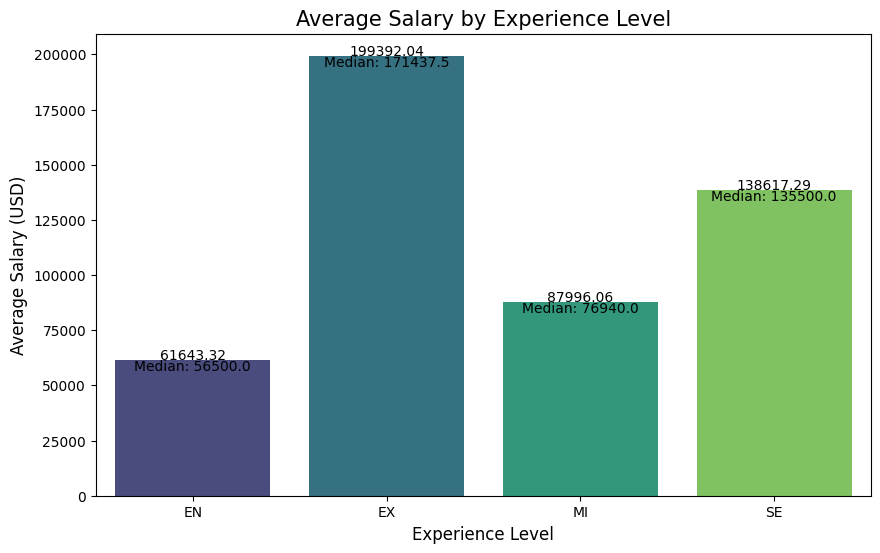

In [19]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='experience_level', y='mean', data=grouped_df, palette='viridis')
barplot.set_title('Average Salary by Experience Level', fontsize=15)
barplot.set_xlabel('Experience Level', fontsize=12)
barplot.set_ylabel('Average Salary (USD)', fontsize=12)
for index, row in grouped_df.iterrows():
    barplot.text(row.name, row['mean'], round(row['mean'], 2), color='black', ha="center")
    barplot.text(row.name, row['mean'] - 5000, f"Median: {round(row['median'], 2)}", color='black', ha="center")

plt.show()

We can notice the crucial difference between middle and senior level.